# INTRODUCTION

This notebook will cover some of the most fundamental concepts of tensor using TensorFlow like:

* Introduction to tensors
* Getting information from tensors
* Manipulating tensors
* Tensors & NumPy
* Using @tf.function (speed up regular Python functions)
* Using GPUs with TensorFlow (TPUs)
* Exercises

## INTRODUCTION TO TENSORS

In [1]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
# creating tensors with tf.constant()
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [3]:
# check the number of dimenstions of a tensor (ndim)
scalar.ndim

0

In [4]:
# create a vector
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [5]:
# check the dimension of the vector
vector.ndim

1

In [6]:
# create a matrix (more then 1 dimension)
matrix = tf.constant([[10, 7],
                      [7, 10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [7]:
# check the dimension of matrix
matrix.ndim

2

In [8]:
# another matrix
matrix_2 = tf.constant([[10., 7.],
                        [7., 10.],
                        [8., 9.]], dtype=tf.float16) # specify the data type
matrix_2

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 7., 10.],
       [ 8.,  9.]], dtype=float16)>

In [9]:
matrix_2.ndim

2

In [10]:
# create a tensor
tensor = tf.constant([[[1, 2, 3],
                       [4, 5, 6]],
                      [[7, 8, 9],
                      [10, 11, 12]],
                     [[13, 14, 15],
                      [16, 17, 18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [11]:
tensor.ndim

3

### WHAT WAS DONE SO FAR

* Scalar: a single number
* Vector: a number with direction (e.g. wind speed and direction)
* Matrix: a 2-dimensional array of numbers
* Tensor: an n-dimensional array of numbers

### CREATING TENSORS WITH `tf.Variable`

In [12]:
tf.Variable

tensorflow.python.ops.variables.Variable

In [13]:
# create the same tensor with tf.Variable() as above
var_tensor = tf.Variable([10, 7])
var_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>

In [14]:
const_tensor = tf.constant([10, 7])
const_tensor

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>

In [15]:
# change values in var_tensor
var_tensor[0].assign(7)
var_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

### CREATING RANDOM TENSORS

💡**NOTE:** Rarely in practice will be needed to use `tf.constant` or `tf.Variable` to create tensors, as TensorFlow does this automatically, but in doubt, use `tf.constant`and change it later if needed

Random tensors are tensors of some arbitrary size which contain random numbers

In [16]:
# create two random (but same) tensors
random_tensor_01 = tf.random.Generator.from_seed(42)
random_tensor_01 = random_tensor_01.normal(shape=(3, 2))

random_tensor_02 = tf.random.Generator.from_seed(42)
random_tensor_02 = random_tensor_02.normal(shape=(3, 2))

# comparing
random_tensor_01, random_tensor_02, random_tensor_01 == random_tensor_02

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193765, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193765, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

### SHUFFLE THE ORDER OF ELEMENTS IN A TENSOR

In [17]:
# shuffle a tensor
not_shuffled = tf.constant([[10, 7],
                            [3, 4],
                            [2, 5]])

not_shuffled, not_shuffled.ndim

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[10,  7],
        [ 3,  4],
        [ 2,  5]], dtype=int32)>,
 2)

In [18]:
# shuffling
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

In [19]:
tf.random.set_seed(42)
tf.random.shuffle(not_shuffled, seed=42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

### OTHER WAYS TO MAKE TENSORS

In [20]:
tf.ones([10, 7])

<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [21]:
tf.zeros([10, 7])

<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

### TURNING NUMPY ARRAYS INTO TENSORS

The maisn difference is that tensors can be run on a GPU (mush faster)


In [22]:
import numpy as np

# capital letters refers to matrix/tensors and non-capital to vectors
np_A = np.arange(1, 25, dtype=np.int32)
np_A

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [23]:
tf_A = tf.constant(np_A)
tf_B = tf.constant(np_A, shape=(2, 3, 4))

tf_A, tf_B

(<tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32)>,
 <tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
 array([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],
 
        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]], dtype=int32)>)

### GETTING INFORMATION FROM TENSORS

* Shape
* Rank
* Axis or dimension
* Size

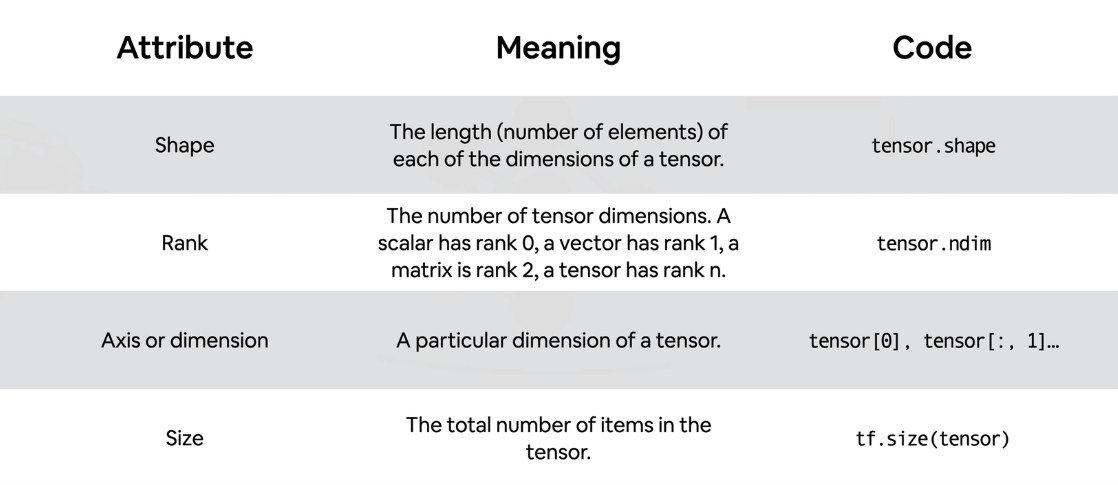

In [24]:
# create a rank 4 tensor
rank_04_tensor = tf.zeros([4, 1, 2, 3])
rank_04_tensor, rank_04_tensor.ndim

(<tf.Tensor: shape=(4, 1, 2, 3), dtype=float32, numpy=
 array([[[[0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [[[0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [[[0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [[[0., 0., 0.],
          [0., 0., 0.]]]], dtype=float32)>,
 4)

In [25]:
rank_04_tensor[0]

<tf.Tensor: shape=(1, 2, 3), dtype=float32, numpy=
array([[[0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)>

In [26]:
rank_04_tensor.shape, rank_04_tensor.ndim, tf.size(rank_04_tensor)

(TensorShape([4, 1, 2, 3]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=24>)

In [27]:
# get various attributes from the tensor
def get_tensor_info(tensor):
  print("Datatype: ", tensor.dtype,
      "\nDimensions (rank): ", tensor.ndim,
      "\nShape: ", tensor.shape,
      "\nSize: ", tf.size(tensor).numpy(),
      "\nElements along the first axis: ", tensor.shape[0],
      "\nElements along the last axis: ", tensor.shape[-1])

get_tensor_info(rank_04_tensor)

Datatype:  <dtype: 'float32'> 
Dimensions (rank):  4 
Shape:  (4, 1, 2, 3) 
Size:  24 
Elements along the first axis:  4 
Elements along the last axis:  3


### INDEXING TENSORS

In [28]:
# get the first 2 elements of each dimension
rank_04_tensor[:2, :2, :2, :2]

<tf.Tensor: shape=(2, 1, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [29]:
# get the first element from each dim from each index except the last one
rank_04_tensor[:1, :1, :1, :]

<tf.Tensor: shape=(1, 1, 1, 3), dtype=float32, numpy=array([[[[0., 0., 0.]]]], dtype=float32)>

In [30]:
# rank 2 tensor
rank_02_tensor = tf.ones([2, 2])
rank_02_tensor

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [31]:
get_tensor_info(rank_02_tensor)

Datatype:  <dtype: 'float32'> 
Dimensions (rank):  2 
Shape:  (2, 2) 
Size:  4 
Elements along the first axis:  2 
Elements along the last axis:  2


In [32]:
# get the last item of each row from the rank 02 tensor
rank_02_tensor[:, :-1]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

In [33]:
# add in extra dimension to the tensor
rank_03_tensor = rank_02_tensor[..., tf.newaxis]
rank_03_tensor

<tf.Tensor: shape=(2, 2, 1), dtype=float32, numpy=
array([[[1.],
        [1.]],

       [[1.],
        [1.]]], dtype=float32)>

In [34]:
# alternative
tf.expand_dims(rank_02_tensor, axis=-1)

<tf.Tensor: shape=(2, 2, 1), dtype=float32, numpy=
array([[[1.],
        [1.]],

       [[1.],
        [1.]]], dtype=float32)>

In [35]:
tf.expand_dims(rank_02_tensor, axis=0)

<tf.Tensor: shape=(1, 2, 2), dtype=float32, numpy=
array([[[1., 1.],
        [1., 1.]]], dtype=float32)>

### MANIPULATING TENSORS (TENSORS OPERATIONS)

#### **BASIC OPERATIONS**

`+` | `-` | `*` | `/`

In [36]:
# adding values
tensor = tf.constant([[10,7],
                     [3, 4]])

tensor, get_tensor_info(tensor)

Datatype:  <dtype: 'int32'> 
Dimensions (rank):  2 
Shape:  (2, 2) 
Size:  4 
Elements along the first axis:  2 
Elements along the last axis:  2


(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[10,  7],
        [ 3,  4]], dtype=int32)>,
 None)

In [37]:
tensor + 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [38]:
tensor - 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, -3],
       [-7, -6]], dtype=int32)>

In [39]:
tensor * 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [40]:
%timeit tensor * 10

59 µs ± 19.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [41]:
tensor / 10

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[1. , 0.7],
       [0.3, 0.4]])>

In [42]:
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

**USING THE TENSORFLOW LIBRARY**

In [43]:
tf.add(tensor, 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [44]:
tf.subtract(tensor, 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, -3],
       [-7, -6]], dtype=int32)>

In [45]:
tf.multiply(tensor, 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [46]:
%timeit tf.multiply(tensor, 10)

88 µs ± 25.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [47]:
tf.divide(tensor, 10)

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[1. , 0.7],
       [0.3, 0.4]])>

**MATRIX MULTIPLICATION**

In ML, matrix multiplication is one of the most commom tensor operation

In [48]:
# matrix multiplication in tf
tf.matmul(tensor, tensor)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [49]:
# matrix multiplication with python (@)
tensor @ tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [50]:
# multiplying matrix of same shape
tensor_02 = tf.constant([[10, 7],
                         [5, 2],
                         [3, 4]])

get_tensor_info(tensor_02), tensor_02

Datatype:  <dtype: 'int32'> 
Dimensions (rank):  2 
Shape:  (3, 2) 
Size:  6 
Elements along the first axis:  3 
Elements along the last axis:  2


(None,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[10,  7],
        [ 5,  2],
        [ 3,  4]], dtype=int32)>)

In [51]:
tensor_03 = tf.constant([[11, 7],
                         [2, 1],
                         [5, 9]])

get_tensor_info(tensor_03), tensor_03

Datatype:  <dtype: 'int32'> 
Dimensions (rank):  2 
Shape:  (3, 2) 
Size:  6 
Elements along the first axis:  3 
Elements along the last axis:  2


(None,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[11,  7],
        [ 2,  1],
        [ 5,  9]], dtype=int32)>)

In [52]:
## -> tf.matmul(tensor_02, tensor_03) won't work because the inner dimensions must match and the result must have the same shape as outer dimensions

In [53]:
# reshape tensor_03
tensor_03_reshaped = tf.reshape(tensor_03, shape=(2, 3))
tensor_03_reshaped

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[11,  7,  2],
       [ 1,  5,  9]], dtype=int32)>

In [54]:
tensor_02.shape, tensor_03_reshaped.shape

(TensorShape([3, 2]), TensorShape([2, 3]))

In [55]:
tf.matmul(tensor_02, tensor_03_reshaped)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[117, 105,  83],
       [ 57,  45,  28],
       [ 37,  41,  42]], dtype=int32)>

In [56]:
# reshape tensor_02
tensor_02_reshaped = tf.reshape(tensor_02, shape=(2, 3))
tensor_02_reshaped

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[10,  7,  5],
       [ 2,  3,  4]], dtype=int32)>

In [57]:
tensor_02_reshaped.shape, tensor_03.shape

(TensorShape([2, 3]), TensorShape([3, 2]))

In [58]:
tf.matmul(tensor_02_reshaped, tensor_03)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[149, 122],
       [ 48,  53]], dtype=int32)>

In [59]:
# use transpose
tensor_02, tf.transpose(tensor_02), tensor_02_reshaped

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[10,  7],
        [ 5,  2],
        [ 3,  4]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[10,  5,  3],
        [ 7,  2,  4]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[10,  7,  5],
        [ 2,  3,  4]], dtype=int32)>)

transpose "flips" the axis, while reshape "reorganize"

In [60]:
# multiplying with transpose
tf.matmul(tf.transpose(tensor_02), tensor_02)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[134,  92],
       [ 92,  69]], dtype=int32)>

In [61]:
# multiplying with reshape
tf.matmul(tf.reshape(tensor_02, shape=(2, 3)), tensor_02)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[150, 104],
       [ 47,  36]], dtype=int32)>

**THE DOT PRODUCT**

Matrix multiplication can also be referred as "dot product"
It's possible to be performed by using:

* `tf.matmul()`
* `tf.tensordot()`

In [62]:
# tensors
tensor_02, tensor_03

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[10,  7],
        [ 5,  2],
        [ 3,  4]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[11,  7],
        [ 2,  1],
        [ 5,  9]], dtype=int32)>)

In [63]:
# tensordot() requires one of the tensors to be transposed
tf.tensordot(tensor_02, tf.transpose(tensor_03), axes=1)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[159,  27, 113],
       [ 69,  12,  43],
       [ 61,  10,  51]], dtype=int32)>

In [64]:
# show tensor's different forms
print("Original tensor_02: ", tensor_02)
print("\ntensor_02 reshaped to (2, 3): ", tf.reshape(tensor_02, shape=(2, 3)))
print("\ntensor_02 transposed: ", tf.transpose(tensor_02))

Original tensor_02:  tf.Tensor(
[[10  7]
 [ 5  2]
 [ 3  4]], shape=(3, 2), dtype=int32)

tensor_02 reshaped to (2, 3):  tf.Tensor(
[[10  7  5]
 [ 2  3  4]], shape=(2, 3), dtype=int32)

tensor_02 transposed:  tf.Tensor(
[[10  5  3]
 [ 7  2  4]], shape=(2, 3), dtype=int32)


### CHANGING THE DATATYPE OF A TENSOR

In [65]:
# create a tensor with a default datatype (float_32)
tensor_float32 = tf.constant([1.7, 7.4])
tensor_float32, tensor_float32.dtype

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.7, 7.4], dtype=float32)>,
 tf.float32)

In [66]:
tensor_int32 = tf.constant([10, 7])
tensor_int32, tensor_int32.dtype

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>,
 tf.int32)

In [67]:
# change from float_32 to float_16 (reduce precision)
tensor_float16 = tf.cast(tensor_float32, dtype=tf.float16)
tensor_float16, tensor_float16.dtype

(<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 7.4], dtype=float16)>,
 tf.float16)

In [68]:
# change from int32 to float32
tensor_float32_02 = tf.cast(tensor_int32, dtype=tf.float32)
tensor_float32_02, tensor_float32_02.dtype

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([10.,  7.], dtype=float32)>,
 tf.float32)

### AGGREGATING TENSORS

Condence them from multiple values down to a smaller amount of values

In [69]:
# get the absolute values
tensor_abs_values = tf.constant([-7, -10])
tf.abs(tensor_abs_values)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>

**FORMS OF AGGREGATION**

* minimum
* maximum
* mean
* sum

In [70]:
tensor_agg_01 = tf.constant([[10, 5, 3],
                          [7, 6, 9]])

tensor_agg_01

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[10,  5,  3],
       [ 7,  6,  9]], dtype=int32)>

In [71]:
tensor_agg_02 = tf.constant([[7, 15, 6],
                          [3, 4, 8]])

tensor_agg_02

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 7, 15,  6],
       [ 3,  4,  8]], dtype=int32)>

In [72]:
# maximum
tf.reduce_max(tensor_agg_01)

<tf.Tensor: shape=(), dtype=int32, numpy=10>

In [73]:
# minimum
tf.reduce_min(tensor_agg_01)

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [74]:
# mean
tf.reduce_mean(tensor_agg_01)

<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [75]:
# sum
tf.reduce_sum(tensor_agg_01)

<tf.Tensor: shape=(), dtype=int32, numpy=40>

In [76]:
# variance
import tensorflow_probability as tfp

tfp.stats.variance(tensor_agg_01)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([2, 0, 9], dtype=int32)>

In [77]:
# standard variation
tf.math.reduce_std(tf.cast(tensor_agg_01, dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=2.3570225>

### FIND THE POSISIONAL MAX AND MIN

In [78]:
tf.random.set_seed(42)
tensor_random_pos = tf.random.uniform(shape=[50])
tensor_random_pos

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

**MAX**

In [79]:
tf.argmax(tensor_random_pos)

<tf.Tensor: shape=(), dtype=int64, numpy=42>

In [80]:
tensor_random_pos[tf.argmax(tensor_random_pos)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [81]:
tf.reduce_max(tensor_random_pos)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [82]:
assert tf.reduce_max(tensor_random_pos) == tensor_random_pos[tf.argmax(tensor_random_pos)]

In [83]:
tf.reduce_max(tensor_random_pos) == tensor_random_pos[tf.argmax(tensor_random_pos)]

<tf.Tensor: shape=(), dtype=bool, numpy=True>

**MIN**

In [84]:
tf.argmin(tensor_random_pos)

<tf.Tensor: shape=(), dtype=int64, numpy=16>

In [85]:
tensor_random_pos[tf.argmin(tensor_random_pos)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.009463668>

In [86]:
tf.reduce_min(tensor_random_pos)

<tf.Tensor: shape=(), dtype=float32, numpy=0.009463668>

In [87]:
assert tf.reduce_min(tensor_random_pos) == tensor_random_pos[tf.argmin(tensor_random_pos)]

In [88]:
tf.reduce_min(tensor_random_pos) == tensor_random_pos[tf.argmin(tensor_random_pos)]

<tf.Tensor: shape=(), dtype=bool, numpy=True>

### SQUEEZING A TENSOR (REMOVING ALL 1-DIMENSIONAL AXES)

In [89]:
tf.random.set_seed(42)
tensor_squeeze = tf.constant(tf.random.uniform(shape=[50]), shape=(1, 1, 1, 1, 50))
tensor_squeeze

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
           0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
           0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
           0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
           0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
           0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
           0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
           0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
           0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
           0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043]]]]],
      dtype=float32)>

In [90]:
tensor_squeeze.shape

TensorShape([1, 1, 1, 1, 50])

In [91]:
tf.squeeze(tensor_squeeze)

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [92]:
tensor_squeeze.shape, tf.squeeze(tensor_squeeze).shape

(TensorShape([1, 1, 1, 1, 50]), TensorShape([50]))

### ONE-HOT ENCODING TENSORS

In [93]:
# create a list of indices
some_list = [0, 1, 2, 3] # could be red, green, blue and purple

# one-hot encode
tf.one_hot(some_list, 4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [94]:
# specify custom values for one hot encoding
tf.one_hot(some_list, 4, "A", "B")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'A', b'B', b'B', b'B'],
       [b'B', b'A', b'B', b'B'],
       [b'B', b'B', b'A', b'B'],
       [b'B', b'B', b'B', b'A']], dtype=object)>

### ANOTHER MATH OPERATIONS

* squaring
* log
* square root

In [95]:
tensor_math_op = tf.range(1, 10)
tensor_math_op

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [96]:
# square
tf.square(tensor_math_op)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)>

In [97]:
# square root
tf.sqrt(tf.cast(tensor_math_op, dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([1.       , 1.4142135, 1.7320508, 2.       , 2.2360678, 2.4494896,
       2.6457512, 2.828427 , 3.       ], dtype=float32)>

In [98]:
# log
tf.math.log(tf.cast(tensor_math_op, dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246], dtype=float32)>

### TENSORS AND NUMPY

TensorFlow interacts with NumPy arrays

In [99]:
# create a tensor from a np array
tensor_from_np = tf.constant(np.array([3., 7., 10.]))
tensor_from_np

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 10.])>

In [100]:
# convert a tensor to a array
np.array(tensor_from_np), type(np.array(tensor_from_np))

(array([ 3.,  7., 10.]), numpy.ndarray)

In [101]:
# another way to convert
tensor_from_np.numpy(), type(tensor_from_np.numpy())

(array([ 3.,  7., 10.]), numpy.ndarray)

### FINDING ACCESS TO GPUs

In [104]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [105]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [107]:
!nvidia-smi

Sun Jun 18 23:51:18 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    27W /  70W |    389MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------